# Unsupervised Learning Techniques
***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("./datasets/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
for column in df.columns[1:]:
    print(f'Value count of column "{column}" is \n {df[column].value_counts()}')

Value count of column "SepalLengthCm" is 
 5.0    10
5.1     9
6.3     9
5.7     8
6.7     8
5.8     7
5.5     7
6.4     7
4.9     6
5.4     6
6.1     6
6.0     6
5.6     6
4.8     5
6.5     5
6.2     4
7.7     4
6.9     4
4.6     4
5.2     4
5.9     3
4.4     3
7.2     3
6.8     3
6.6     2
4.7     2
7.6     1
7.4     1
7.3     1
7.0     1
7.1     1
5.3     1
4.3     1
4.5     1
7.9     1
Name: SepalLengthCm, dtype: int64
Value count of column "SepalWidthCm" is 
 3.0    26
2.8    14
3.2    13
3.1    12
3.4    12
2.9    10
2.7     9
2.5     8
3.5     6
3.3     6
3.8     6
2.6     5
2.3     4
3.7     3
2.4     3
2.2     3
3.6     3
3.9     2
4.4     1
4.0     1
4.1     1
4.2     1
2.0     1
Name: SepalWidthCm, dtype: int64
Value count of column "PetalLengthCm" is 
 1.5    14
1.4    12
5.1     8
4.5     8
1.6     7
1.3     7
5.6     6
4.7     5
4.9     5
4.0     5
4.2     4
5.0     4
4.4     4
4.8     4
1.7     4
3.9     3
4.6     3
5.7     3
4.1     3
5.5     3
6.1     3
5.8     3
3.3  

No null values or unknown characters present

In [6]:
data = df.iloc[:, 1:5]
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [8]:
data.shape

(150, 4)

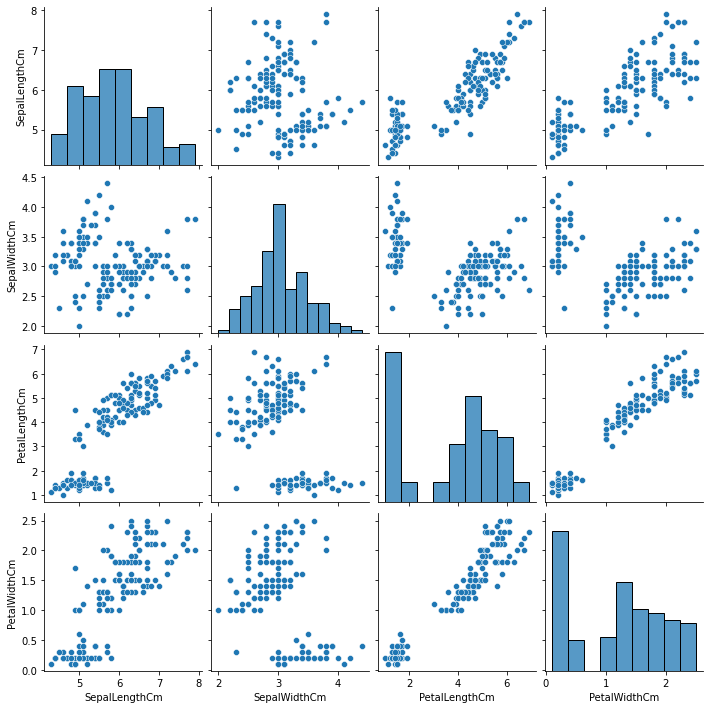

In [9]:
# Pair plot
sns.pairplot(data)

Clusters are available

### 1. K-Means Clustering
***

In [10]:
# Top down approach
# Find optimal k-value using Elbow method
from sklearn.cluster import KMeans

In [11]:
def draw_elbow(data):
    kpoints = range(1,7)
    inertias = []
    for k in kpoints:
        inertias.append(KMeans(k).fit(data).inertia_)
    plt.plot(kpoints, inertias, "-o")
    plt.title("Elbow Graph")
    plt.xlabel("K-Points")
    plt.ylabel("Inertias")
    plt.show()

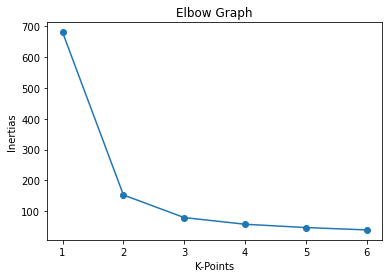

In [12]:
draw_elbow(data)

From the above elbow graph it can be concluded that best k value is 3

In [25]:
model_kmeans = KMeans(n_clusters=3, init="k-means++", random_state=42)
model_kmeans.fit(data)
kmeans_clusters = model_kmeans.labels_

In [26]:
# Cross Tab to check accuracy
# in real life scenarios this is not possible as we dont have any class labels for our dataset
# this is just for demostration for the need of normalisation
pd.crosstab(kmeans_clusters, df.Species)

Species,Iris-setosa,Iris-versicolor,Iris-virginica
row_0,,,
0,0,48,14
1,50,0,0
2,0,2,36


### Normalize using PipeLine

In [27]:
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(Normalizer(), model_kmeans).fit(data)
kmeans_clusters = model_kmeans.labels_

In [28]:
pd.crosstab(kmeans_clusters, df.Species)

Species,Iris-setosa,Iris-versicolor,Iris-virginica
row_0,,,
0,0,5,50
1,50,0,0
2,0,45,0


### 2. Agglomerative Clustering
***

In [29]:
data_normal = pd.DataFrame(Normalizer().fit_transform(data), columns=data.columns)

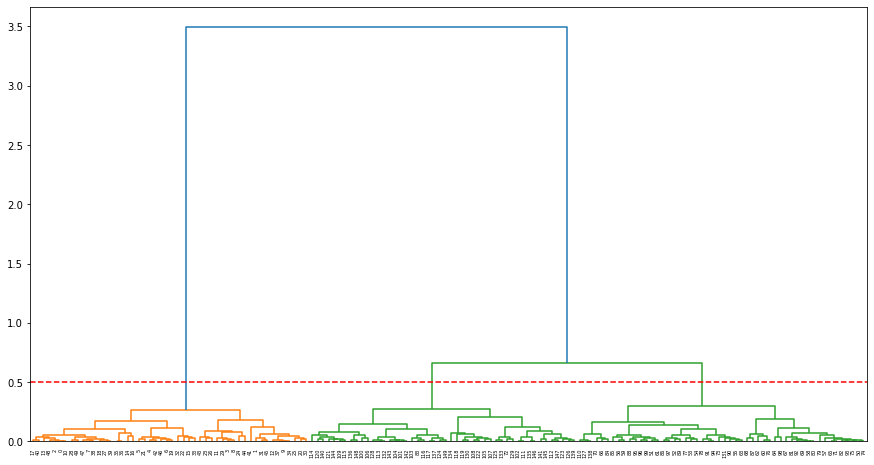

In [24]:
# Plot dendrogram
from scipy.cluster.hierarchy import linkage, dendrogram
plt.figure(figsize=(15, 8))
dendrogram(linkage(data_normal, method="ward"), orientation="top", distance_sort="ascending", show_leaf_counts=True)
plt.hlines(0.5, 0, 5000, colors = "r", linestyles="dashed")
plt.show()

In [30]:
# Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering
model_ag = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage = "ward")
ag_clusters = model_ag.fit(data_normal).labels_

In [31]:
pd.crosstab(ag_clusters, df.Species)

Species,Iris-setosa,Iris-versicolor,Iris-virginica
row_0,,,
0,0,48,4
1,50,0,0
2,0,2,46


So the better one is with KMeans

### Attaching Cluster to data

In [33]:
data["Cluster"] = kmeans_clusters

In [34]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


Each cluster can be named according to business needs

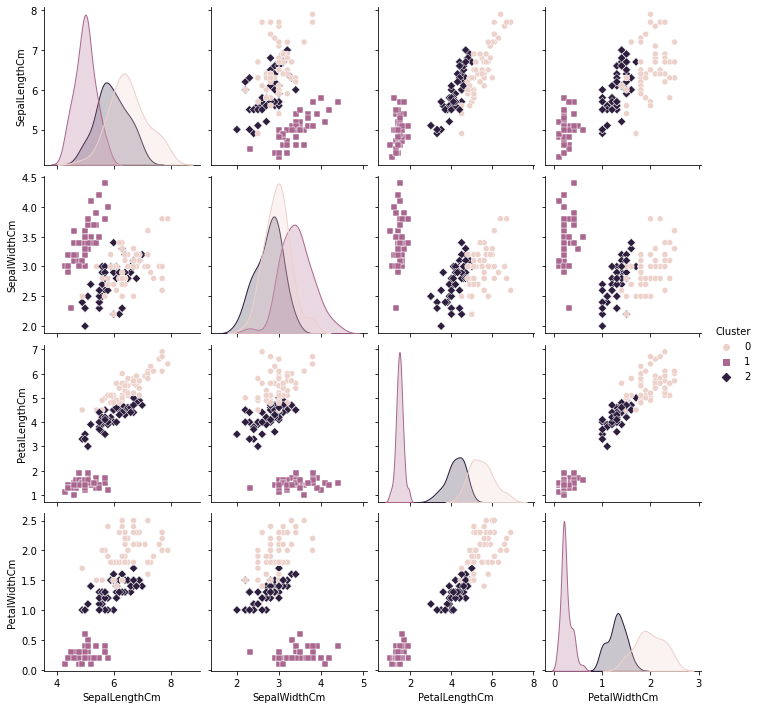

In [38]:
sns.pairplot(data, hue = "Cluster", markers=["o", "s", "D"])

***